In [3]:
import pandas as pd
import numpy as np
from src.models import kernelSVM
import matplotlib.pyplot as plt

In [24]:
def graph_to_suequences(graph):
    dictionary = {}
    for node in graph.nodes:
        node_edges = graph.edges(node)
        for edge in node_edges:
            other_node = edge[1]
            sequence = (graph.nodes[node]['labels'][0], graph.edges[edge]['labels'][0], graph.nodes[other_node]['labels'][0])
            if sequence in dictionary:
                dictionary[sequence] += 1
            else:
                dictionary[sequence] = 1
    return dictionary

In [28]:
def kernel(g1, g2):
    d1 = graph_to_suequences(g1)
    d2 = graph_to_suequences(g2)
    res = 0
    for key in d1:
        if key in d2:
            res += d1[key] * d2[key]
    return res

In [34]:
def kernel_matrix(graphs):
    n = len(graphs)
    K = np.zeros((n,n))
    for i in range(n):
        print(i, '/', n)
        for j in range(n):
            K[i,j] = kernel(graphs[i], graphs[j])
    return K

In [29]:
training = pd.read_pickle('data/training_data.pkl')
labels = pd.read_pickle('data/training_labels.pkl')
val_data = pd.read_pickle('data/test_data.pkl')

In [35]:
K_train = kernel_matrix(training)
K_test = kernel_matrix(val_data)

0 / 6000
1 / 6000
2 / 6000
3 / 6000
4 / 6000
5 / 6000
6 / 6000
7 / 6000
8 / 6000
9 / 6000
10 / 6000
11 / 6000
12 / 6000
13 / 6000
14 / 6000
15 / 6000
16 / 6000
17 / 6000
18 / 6000
19 / 6000
20 / 6000
21 / 6000
22 / 6000
23 / 6000
24 / 6000
25 / 6000
26 / 6000
27 / 6000
28 / 6000
29 / 6000
30 / 6000
31 / 6000
32 / 6000
33 / 6000
34 / 6000
35 / 6000
36 / 6000
37 / 6000
38 / 6000
39 / 6000
40 / 6000
41 / 6000
42 / 6000
43 / 6000
44 / 6000
45 / 6000
46 / 6000
47 / 6000
48 / 6000
49 / 6000
50 / 6000
51 / 6000
52 / 6000
53 / 6000
54 / 6000
55 / 6000
56 / 6000
57 / 6000
58 / 6000
59 / 6000
60 / 6000
61 / 6000
62 / 6000
63 / 6000
64 / 6000
65 / 6000
66 / 6000
67 / 6000
68 / 6000
69 / 6000
70 / 6000
71 / 6000
72 / 6000
73 / 6000
74 / 6000
75 / 6000
76 / 6000
77 / 6000
78 / 6000
79 / 6000
80 / 6000
81 / 6000
82 / 6000
83 / 6000
84 / 6000
85 / 6000
86 / 6000
87 / 6000
88 / 6000
89 / 6000
90 / 6000
91 / 6000
92 / 6000
93 / 6000
94 / 6000
95 / 6000
96 / 6000
97 / 6000
98 / 6000
99 / 6000
100 / 6000

In [ ]:
def frequencies_array(array):
    res = np.zeros(10)
    for i in range(10):
        res[i] = np.sum(array == i)
    return res

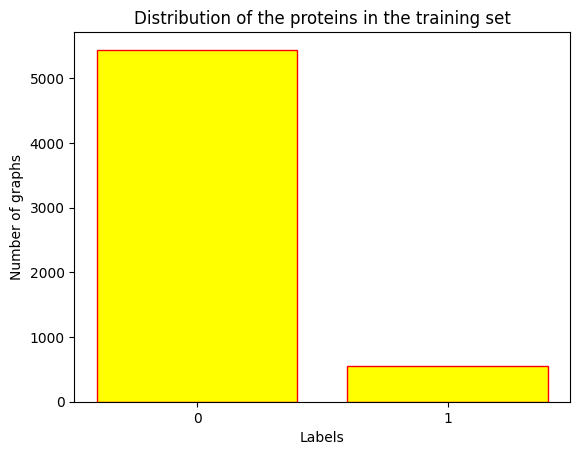

In [88]:
plt.hist(labels, range = (0,2), bins = [-0.5, 0.5, 1.5], color = 'yellow', edgecolor = 'red', rwidth=0.8)
plt.xlabel('Labels')
plt.xticks(np.arange(0, 2))
plt.ylabel('Number of graphs')
plt.title('Distribution of the proteins in the training set')
plt.show()

In [83]:
def frenquency_labels(graph):
    labels = np.zeros(4)
    for edge in graph.edges:
        labels[graph.edges[edge]['labels'][0]] += 1
    return labels

In [80]:
def number_of_labels_nodes(graphs):
    labels = []
    for graph in graphs:
        for edge in graph.edges:
            labels.append(graph.edges[edge]['labels'][0])
    return set(labels)

In [81]:
number_of_labels_nodes(val_data)

{0, 1, 2, 3}

In [79]:
number_of_labels_nodes(val_data)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30}

In [101]:
frenquency_labels_all_graphs = np.zeros(4)
for graph in training:
    frenquency_labels_all_graphs += frenquency_labels(graph)
frenquency_labels_all_graphs = np.array([int(el) for el in frenquency_labels_all_graphs])
x1 = []
for i in range(4):
    rep = frenquency_labels_all_graphs[i]
    for _ in range(rep):
        x1.append(i)

In [102]:
frenquency_labels_all_graphs2 = np.zeros(4)
for graph in val_data:
    frenquency_labels_all_graphs2 += frenquency_labels(graph)
frenquency_labels_all_graphs2 = np.array([int(el) for el in frenquency_labels_all_graphs2])
x2 = []
for i in range(4):
    rep = frenquency_labels_all_graphs2[i]
    for _ in range(rep):
        x2.append(i)

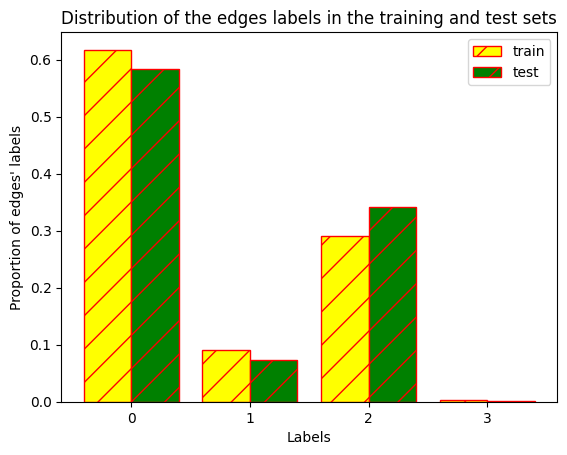

In [106]:
plt.hist([x1, x2], range = (0,4), bins = [-0.5, 0.5, 1.5, 2.5, 3.5], color = ['yellow', 'green'], edgecolor = 'red', rwidth=0.8, hatch='/', label=['train', 'test'], density=True)
plt.xlabel('Labels')
plt.xticks(np.arange(0, 4))
plt.ylabel("Proportion of edges' labels")
plt.legend()
plt.title('Distribution of the edges labels in the training and test sets')
plt.show()